# **[Trend Technical Indicators](https://github.com/bukosabino/ta/blob/master/ta/trend.py)**
---

#### Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Technical Analysis Library 
import ta
import datetime

from pandas_datareader import data as web
from ta.utils import dropna

#### Import Data

In [2]:
stock = 'MSFT'
days_back = 252

start_date = (datetime.datetime.now() - datetime.timedelta(days=days_back)).strftime("%m-%d-%Y")
df = web.DataReader(stock, data_source = 'yahoo', start=start_date)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2021-08-17 to 2022-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       175 non-null    float64
 1   Low        175 non-null    float64
 2   Open       175 non-null    float64
 3   Close      175 non-null    float64
 4   Volume     175 non-null    float64
 5   Adj Close  175 non-null    float64
dtypes: float64(6)
memory usage: 9.6 KB


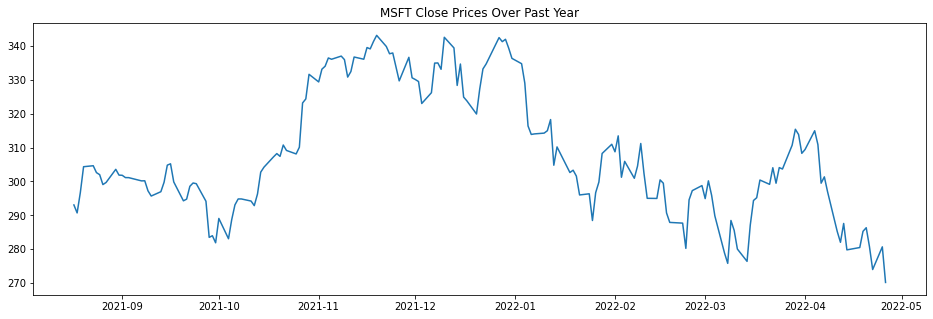

In [3]:
plt.figure(figsize=(16,5))
plt.plot(df['Close'])

plt.title('{} Close Prices Over Past Year'.format(stock))
plt.show()

### Aroon Indicator
---
- identify when trends are likely to change direction 

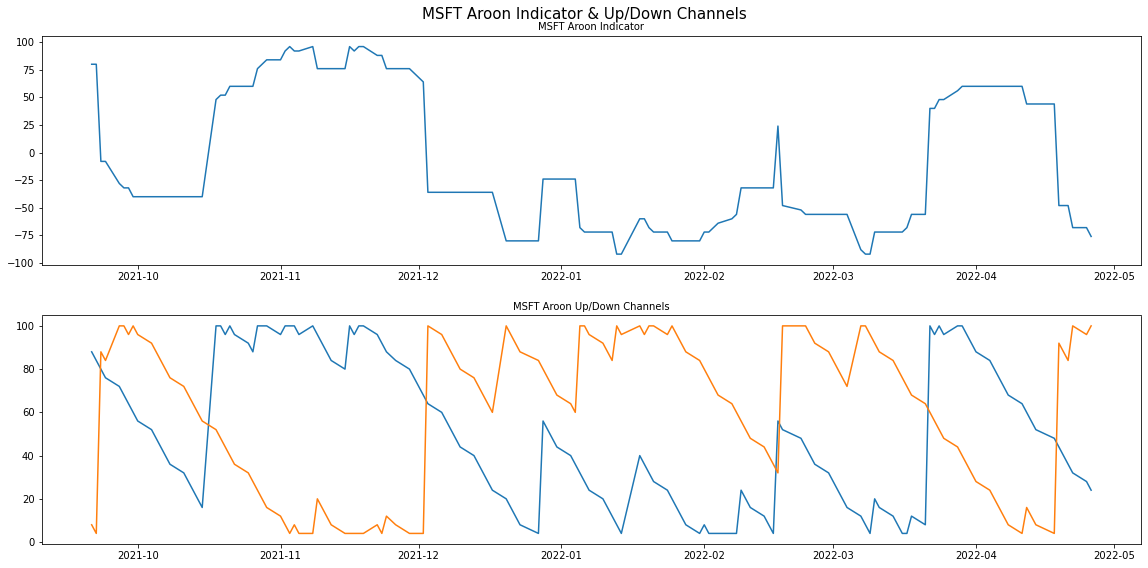

In [4]:
aroon = ta.trend.AroonIndicator(df['Close'],window=25)

plt.rcParams['figure.figsize'] = [16,8]
figure, axis = plt.subplots(nrows=2,ncols=1, sharex=False)

figure.suptitle('{} Aroon Indicator & Up/Down Channels'.format(stock), fontsize=15)
figure.tight_layout(h_pad=3)


axis[1].plot(aroon.aroon_up(), label='Aroon Up Channel')
axis[1].plot(aroon.aroon_down(), label='Aroon Down Channel')
axis[1].set_title('{} Aroon Up/Down Channels'.format(stock),fontsize=10)

axis[0].plot(aroon.aroon_indicator(), label='Aroon Indicator')
axis[0].set_title('{} Aroon Indicator'.format(stock), fontsize=10)
plt.show()

### Moving Average Convergence/Divergence (MACD)
---
- looking for when the lines cross one another 

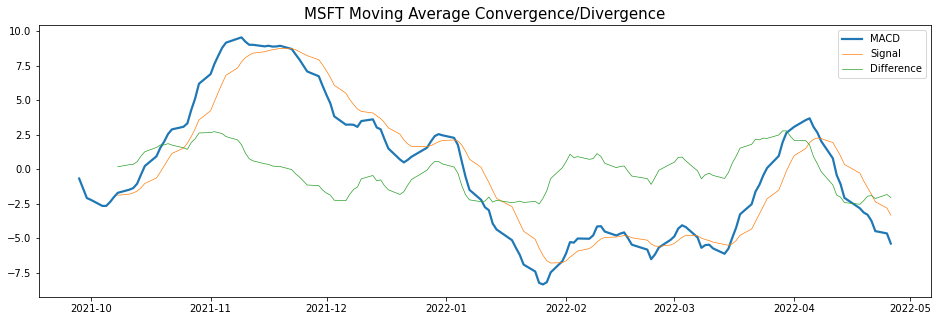

In [5]:
macd = ta.trend.MACD(close=df['Close'], window_slow=30, window_fast=15, window_sign=9)

plt.figure(figsize=(16,5))
plt.plot(macd.macd(), label='MACD', linewidth=2.2)
plt.plot(macd.macd_signal(), label='Signal', linewidth=.7)
plt.plot(macd.macd_diff(), label='Difference', linewidth=.7)

plt.title('{} Moving Average Convergence/Divergence'.format(stock),fontsize=15)
plt.legend(loc=1)
plt.show()

### Exponential Moving Average (EMA)
---

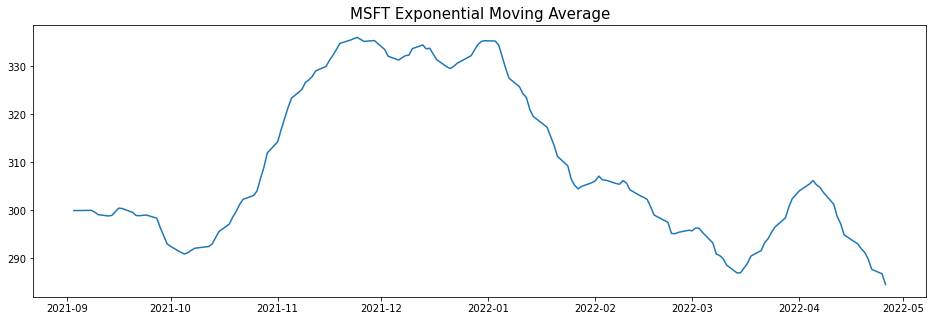

In [6]:
ema = ta.trend.EMAIndicator(df['Close'],window=14)

plt.figure(figsize=(16,5))
plt.plot(ema.ema_indicator())

plt.title('{} Exponential Moving Average'.format(stock),fontsize=15)
plt.show()

### Simple Moving Average 
---

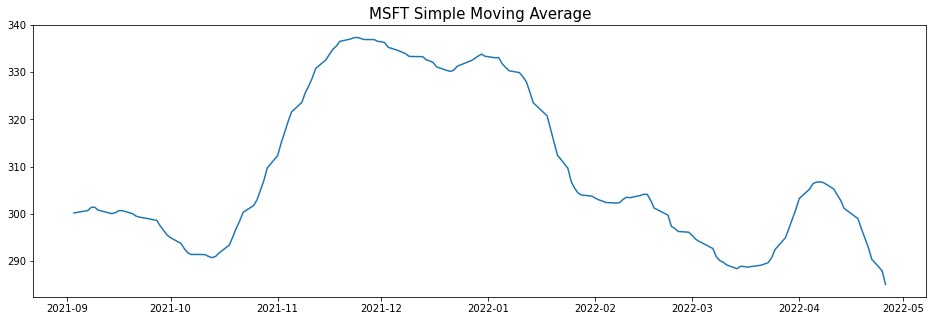

In [7]:
sma = ta.trend.SMAIndicator(df['Close'],window=14)

plt.figure(figsize=(16,5))
plt.plot(sma.sma_indicator())

plt.title('{} Simple Moving Average'.format(stock),fontsize=15)
plt.show()

### Weighted Moving Average
---

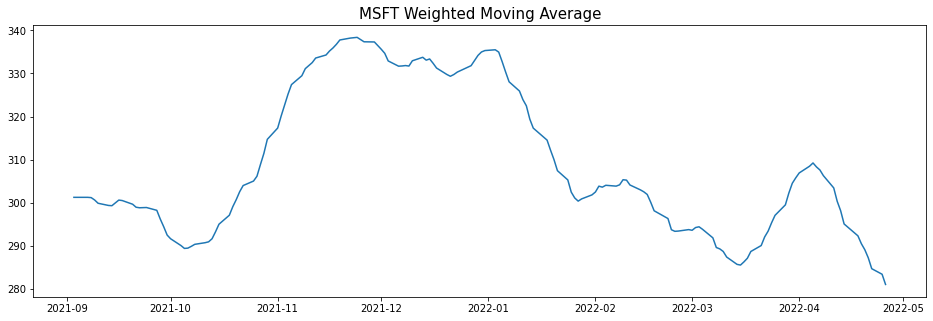

In [8]:
wma = ta.trend.WMAIndicator(df['Close'],window=14)

plt.figure(figsize=(16,5))
plt.plot(wma.wma())

plt.title('{} Weighted Moving Average'.format(stock), fontsize=15)
plt.show()

### TRIX Indicator
---
- shows % rate of change of a triple exponentially smoothed moving average 

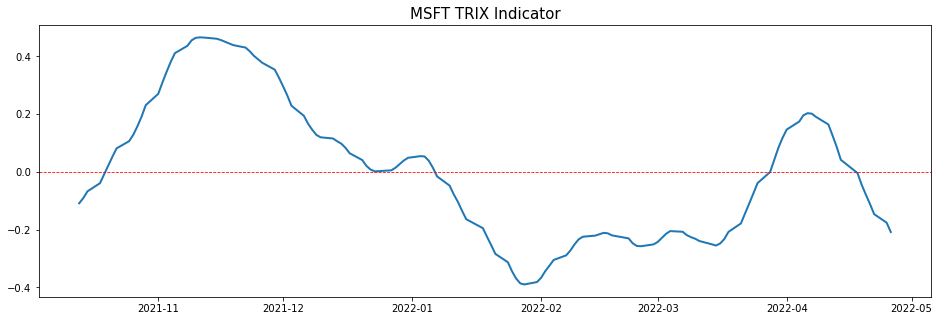

In [9]:
trix = ta.trend.TRIXIndicator(df['Close'],window=14)

plt.figure(figsize=(16,5))
plt.plot(trix.trix(), linewidth=2)
plt.axhline(y=0,color='r',linestyle='--',linewidth=.8)

plt.title('{} TRIX Indicator'.format(stock), fontsize=15)
plt.show()

### Mass Index (MI)
---
- uses high-low range to identify trend reversals based on range expansions
- identifies range bulges that can foreshadow a reversal of a current trend 

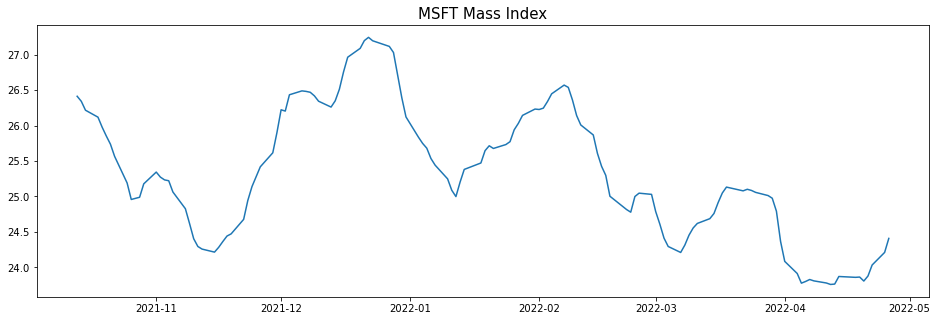

In [10]:
mi = ta.trend.MassIndex(df['High'],df['Low'],window_fast=9,window_slow=25)

plt.figure(figsize=(16,5))
plt.plot(mi.mass_index())

plt.title('{} Mass Index'.format(stock), fontsize=15)
plt.show()

### Ichimoku Indicator
---

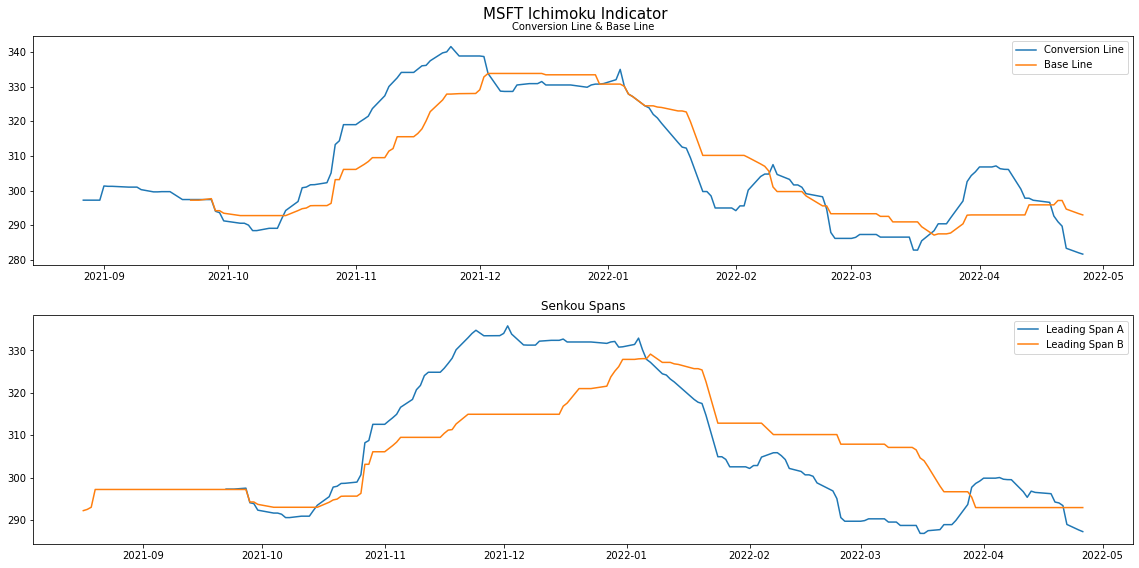

In [11]:
ichi = ta.trend.IchimokuIndicator(df['High'],df['Low'], window1=9, window2=26, window3=52)

plt.rcParams['figure.figsize'] = [16,8]
figure, axis = plt.subplots(nrows=2,ncols=1, sharex=False)
figure.suptitle('{} Ichimoku Indicator'.format(stock), fontsize=15)
figure.tight_layout(h_pad=3)

axis[0].plot(ichi.ichimoku_conversion_line(), label='Conversion Line')
axis[0].plot(ichi.ichimoku_base_line(), label='Base Line')
axis[0].set_title('Conversion Line & Base Line',fontsize=10)
axis[0].legend(loc=1)

axis[1].plot(ichi.ichimoku_a(), label='Leading Span A')
axis[1].plot(ichi.ichimoku_b(), label='Leading Span B')
axis[1].set_title('Senkou Spans')
axis[1].legend(loc=1)

plt.show()

### Know Sure Thing Oscillator (KST Signal)
---

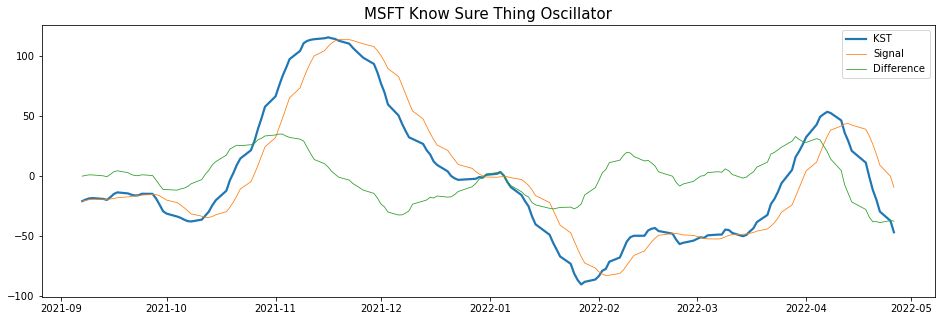

In [12]:
kst = ta.trend.KSTIndicator(df['Close'], roc1=10,roc2=15,roc3=20,roc4=30, window1=10,window2=10,window3=10,window4=15, nsig=9)

plt.figure(figsize=(16,5))
plt.plot(kst.kst(), label='KST', linewidth=2.2)
plt.plot(kst.kst_sig(), label='Signal', linewidth=.8)
plt.plot(kst.kst_diff(), label='Difference', linewidth=.8)

plt.title('{} Know Sure Thing Oscillator'.format(stock), fontsize=15)
plt.legend(loc=1)
plt.show()

### Detrended Price Oscillator (DPO)
---
- indicator designed to remove trend from price and make it easier to identify cycles 

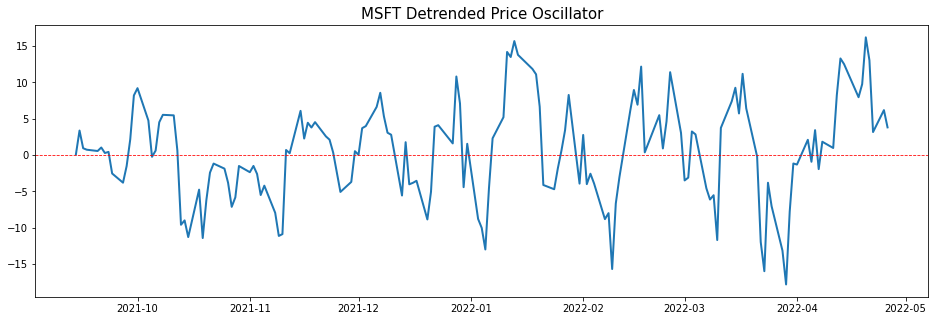

In [13]:
dpo = ta.trend.DPOIndicator(df['Close'], window=20)

plt.figure(figsize=(16,5))
plt.plot(dpo.dpo(),linewidth=2)
plt.axhline(y=0, linestyle='--', color='r', linewidth=.8)

plt.title('{} Detrended Price Oscillator'.format(stock),fontsize=15)
plt.show()

### Commodity Channel Index (CCI)
---
- measures difference between a securities price change and it's average price change 
    - high change = prices above average (strong)
    - low change = prices below average (weak) 
- positive and hits zero we want to sell 
- negative and hits zero we want to buy 

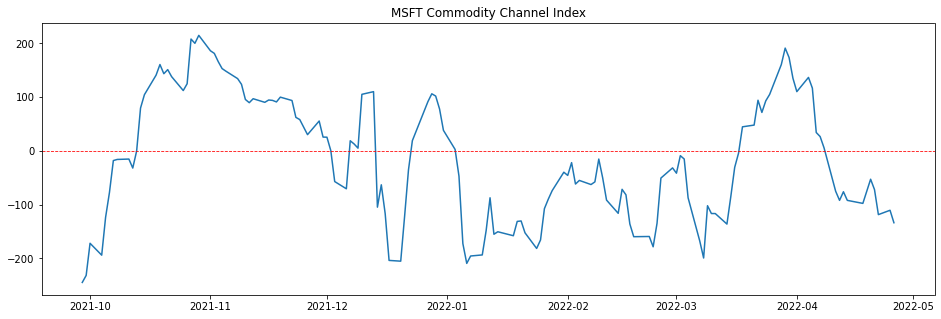

In [14]:
cci = ta.trend.cci(df['High'], df['Low'],df['Close'], window=31, constant=0.015)

plt.figure(figsize=(16,5))
plt.plot(cci)
plt.axhline(y=0, color='r', linestyle='--',linewidth=.8)

plt.title('{} Commodity Channel Index'.format(stock))
plt.show()